In [1]:
import os

In [3]:
os.getcwd()

'C:\\Users\\kaanh\\OneDrive\\Desktop'

In [4]:
import pandas as pd
import numpy as np

In [5]:
number_of_assets=5
number_of_observations=4000
return_vec= np.random.randn(number_of_assets, number_of_observations)
return_vec

array([[-0.20014514, -0.25820402,  1.13548078, ..., -0.42219624,
        -1.09913264,  0.61884326],
       [ 1.15659941, -2.10753985, -1.00015243, ..., -0.58221829,
        -0.15053303,  0.23921578],
       [ 1.2456617 ,  0.703594  , -0.0581619 , ..., -0.32803357,
         1.5957989 , -0.9872685 ],
       [ 0.00911405,  2.64871966, -0.56856776, ..., -1.67098371,
        -1.36166675,  1.03699901],
       [ 1.15872807,  1.8688384 ,  0.70171335, ..., -0.67732176,
        -1.38546845, -1.79664156]])

In [6]:
def rand_weights(n):
    k = np.random.rand(n)
    return (k)/(sum(k))

In [7]:
def random_portfolio(returns):
    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    return mu, sigma

In [8]:
number_of_portfolio=1000

In [9]:
while True:
    means, stds = np.column_stack([
        random_portfolio(return_vec) 
        for _ in range(number_of_portfolio)
        ])
    if stds.all() <= 2:
        break

In [10]:
means

array([[-7.74906457e-04],
       [ 2.81953526e-03],
       [ 2.89127006e-03],
       [ 8.81709129e-03],
       [-5.31353901e-03],
       [ 2.10427830e-03],
       [-1.08934448e-03],
       [-5.33432166e-03],
       [ 7.65836353e-03],
       [ 2.57830716e-03],
       [ 7.11233026e-03],
       [-5.70250302e-03],
       [ 8.22700689e-03],
       [ 3.99598944e-03],
       [-1.07816781e-03],
       [ 7.49869645e-05],
       [-3.65598952e-04],
       [ 2.67165236e-03],
       [ 3.11140896e-03],
       [ 4.17393679e-03],
       [-1.07428703e-03],
       [-2.16527816e-03],
       [ 4.32411913e-03],
       [ 1.52681515e-03],
       [ 3.92795522e-03],
       [-1.29140381e-04],
       [-2.60222402e-04],
       [-1.39881705e-03],
       [ 3.21511891e-03],
       [ 1.69630961e-03],
       [ 1.03411325e-03],
       [ 5.26121333e-03],
       [ 2.79392214e-03],
       [ 3.05724281e-04],
       [ 1.61004512e-03],
       [-9.03705357e-04],
       [ 5.53732526e-03],
       [ 4.45894128e-03],
       [-7.1

In [11]:

stds

array([[0.51592178],
       [0.48443242],
       [0.46380542],
       [0.55261753],
       [0.6345474 ],
       [0.46071201],
       [0.48591479],
       [0.54429605],
       [0.57716429],
       [0.4953823 ],
       [0.50694015],
       [0.56047903],
       [0.54983202],
       [0.53749961],
       [0.52800464],
       [0.59480603],
       [0.52334481],
       [0.54738681],
       [0.5502765 ],
       [0.52694771],
       [0.47809485],
       [0.47894966],
       [0.52264202],
       [0.45288222],
       [0.61710419],
       [0.46205625],
       [0.51205606],
       [0.52627686],
       [0.5056772 ],
       [0.45975693],
       [0.4748468 ],
       [0.5005024 ],
       [0.4632592 ],
       [0.46081768],
       [0.58501822],
       [0.48132711],
       [0.5558669 ],
       [0.46491922],
       [0.5004077 ],
       [0.49950218],
       [0.45370011],
       [0.63901924],
       [0.58172037],
       [0.54206579],
       [0.48650742],
       [0.53252034],
       [0.48412634],
       [0.638

In [12]:
len(stds)

1000

In [13]:
len(means)

1000

In [14]:
import plotly.graph_objects as go

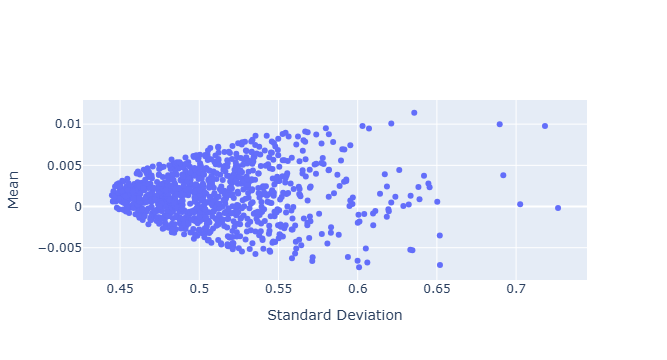

In [15]:
fig = go.Figure()
fig.update_layout(xaxis_title='Standard Deviation', 
                  yaxis_title='Mean')
fig.add_trace(go.Scatter(x=stds.flatten(), y=means.flatten(),mode='markers'))
fig.show()

In [16]:
import cvxopt as opt

In [17]:
from cvxopt import blas, solvers

In [18]:
def optimize(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] for mu in mus]
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    
    return np.asarray(wt), returns, risks

In [19]:

weights, returns, risks = optimize(return_vec)

     pcost       dcost       gap    pres   dres
 0:  7.9517e-03 -1.0060e+00  1e+00  0e+00  3e+00
 1:  7.7703e-03 -1.5487e-02  2e-02  7e-17  6e-02
 2:  5.8387e-03  3.7664e-03  2e-03  2e-16  1e-03
 3:  5.5653e-03  5.4081e-03  2e-04  8e-17  2e-05
 4:  5.5461e-03  5.5361e-03  1e-05  8e-17  9e-08
 5:  5.5459e-03  5.5458e-03  1e-07  2e-16  9e-10
 6:  5.5459e-03  5.5459e-03  1e-09  7e-17  9e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.1625e-03 -1.0047e+00  1e+00  3e-16  3e+00
 1:  8.9863e-03 -1.4067e-02  2e-02  8e-17  6e-02
 2:  7.2817e-03  5.3557e-03  2e-03  1e-16  1e-03
 3:  7.0770e-03  6.9509e-03  1e-04  1e-16  2e-05
 4:  7.0687e-03  7.0647e-03  4e-06  7e-17  2e-07
 5:  7.0687e-03  7.0687e-03  4e-08  9e-17  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0521e-02 -1.0032e+00  1e+00  2e-16  3e+00
 1:  1.0350e-02 -1.2480e-02  2e-02  8e-17  6e-02
 2:  8.8550e-03  7.0852e-03  2e-03  1e-16  1e-03
 3:  8.7063e-03  8.6103e

In [20]:
len(returns)

100

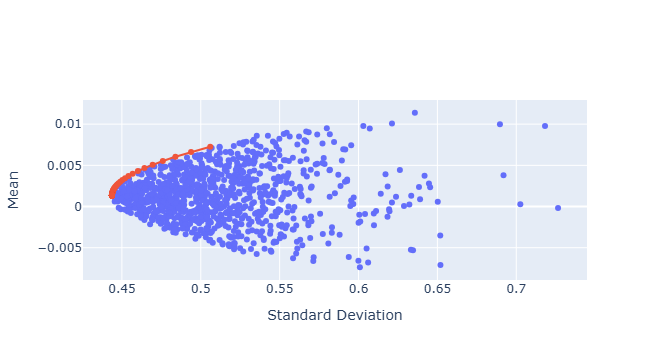

In [21]:
fig = go.Figure()
fig.update_layout(xaxis_title='Standard Deviation', 
                  yaxis_title='Mean',
                  showlegend=False)
fig.add_trace(go.Scatter(x=stds.flatten(), y=means.flatten(),mode='markers'))
fig.add_trace(go.Scatter(x=risks,y=returns,mode='markers+lines',name='Efficient Frontier'))
fig.show()

In [22]:
weights

array([[2.19743007e-01],
       [1.84520591e-08],
       [7.80256754e-01],
       [2.16322491e-07],
       [3.57365803e-09]])

In [23]:
sum_weights=0
for each in weights:
    sum_weights+=each[0]

In [24]:
sum_weights

0.9999999999999999